#### Import all the python libraries

In [214]:
import warnings
# Set to ignore any warnings
warnings.filterwarnings('ignore')

In [215]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#### Read the solar wind data at 1~au 

In [216]:
df = pd.read_csv('Data_collection/Data/1992-2023.csv1', skiprows=None)#, header=True)

In [217]:
df.columns = ['date','B','T[K]','Np','Ur']

In [218]:
df['date'] = pd.to_datetime(df['date'])

In [219]:
df.set_index(df['date'],inplace = True)

In [220]:
sw = df.drop(columns = ['date'])

#### Check for nulls

In [221]:
sw.isna().sum()

B       0
T[K]    0
Np      0
Ur      0
dtype: int64

#### Check for unique values

In [222]:
### Minimum solar wind speed observed
np.min(sw['Ur'].unique())

228.0

In [223]:
### Maximum solar wind speed observed
np.max(sw['Ur'].unique())

9999.0

In [224]:
### Replace the max wind speed or 9999.0 as nan
sw['Ur'] = sw['Ur'].replace(9999.0, np.nan)  

In [225]:
### Categorize the wind speed into slow, and fast solar wind speed
sw.loc[(sw['Ur'] > 200.0) & (sw['Ur'] < 450.0), 'Wind_Category'] = 'Slow'
sw.loc[(sw['Ur'] >=450) & (sw['Ur'] < 850.0), 'Wind_Category'] = 'Fast'
sw.loc[sw['Ur'] > 850, 'Wind_Category'] = 'other'

In [226]:
np.max(sw['Ur'])

1189.0

##### Pie chart for the solar wind distribution from year 1992 to 2022 december

In [227]:
sw['Wind_Category'].value_counts(dropna = False)

Wind_Category
Slow     168535
Fast      85775
NaN       17246
other       196
Name: count, dtype: int64

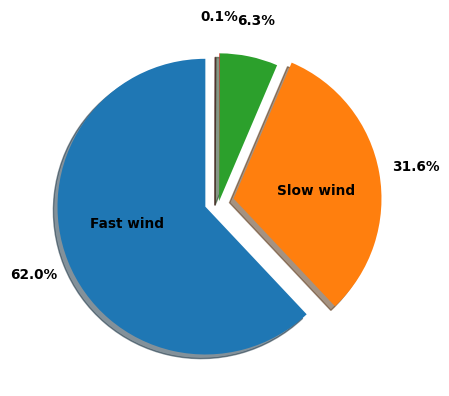

In [230]:
fig, ax = plt.subplots()

explode = (0.1, 0.1, 0,0)
labels = 'Fast wind', 'Slow wind', '',''

ax.pie(sw['Wind_Category'].value_counts(dropna = False),explode = explode, 
       labels=labels,autopct='%1.1f%%',labeldistance=0.3,pctdistance=1.25, shadow= True, startangle=90,
      textprops={'size': 9.8,'fontweight' : 'bold'})


plt.show()

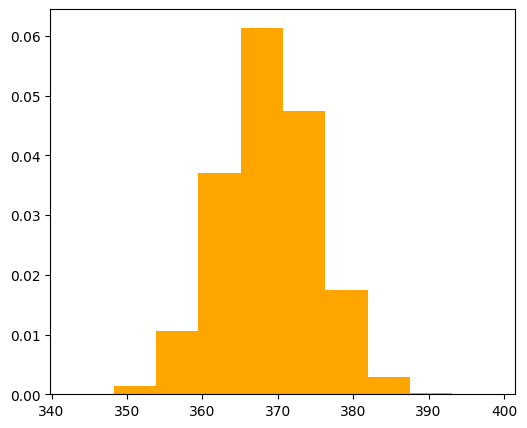

In [264]:
fig, ax = plt.subplots(figsize=(6, 5))

xbars = [np.mean(np.random.choice(sw['Ur'][sw['Wind_Category'] == 'Slow'], size=50)) for _ in range(100000)]

ax.hist(xbars,color='orange', density = True);

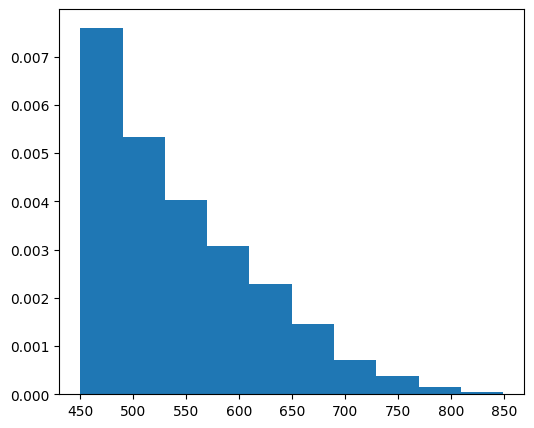

In [263]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.hist(sw['Ur'][sw['Wind_Category'] == 'Fast'], density = True);

In [282]:
df2 = pd.read_csv('Data_collection/Data/kp1932.csv', skiprows=3)#, header=True)

In [287]:
df3 =df2.set_index('Kp')

In [289]:
df3.shape

(42, 12)

In [360]:
df4= df3.iloc[2:39].drop(np.nan).fillna(0.0).replace({'.':0.0}).astype(float)

In [362]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 0o to 9o
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Jan     28 non-null     float64
 1   Feb     28 non-null     float64
 2   Mar     28 non-null     float64
 3   Apr     28 non-null     float64
 4   May     28 non-null     float64
 5   Jun     28 non-null     float64
 6   Jul     28 non-null     float64
 7   Aug     28 non-null     float64
 8   Sep     28 non-null     float64
 9   Oct     28 non-null     float64
 10  Nov     28 non-null     float64
 11  Dec     28 non-null     float64
dtypes: float64(12)
memory usage: 2.8+ KB


In [434]:
pd.DataFrame(df4.iloc[15:18].reset_index().drop(columns='Kp').sum(axis=0))

,0
Jan,4.0
Feb,3.0
Mar,17.0
Apr,14.0
May,2.0
Jun,0.0
Jul,2.0
Aug,5.0
Sep,9.0
Oct,5.0


In [367]:
y = df4.index
x = df4['Jan']

In [435]:
pd.DataFrame(df4.iloc[0:14].loc[:,:].reset_index().drop(columns='Kp').sum(axis=0))

,0
Jan,241.0
Feb,226.0
Mar,215.0
Apr,216.0
May,236.0
Jun,240.0
Jul,243.0
Aug,231.0
Sep,226.0
Oct,237.0


In [ ]:
pd.DataFrame(df4.iloc[0:14].loc[:,:].reset_index().drop(columns='Kp').sum(axis=0)).T

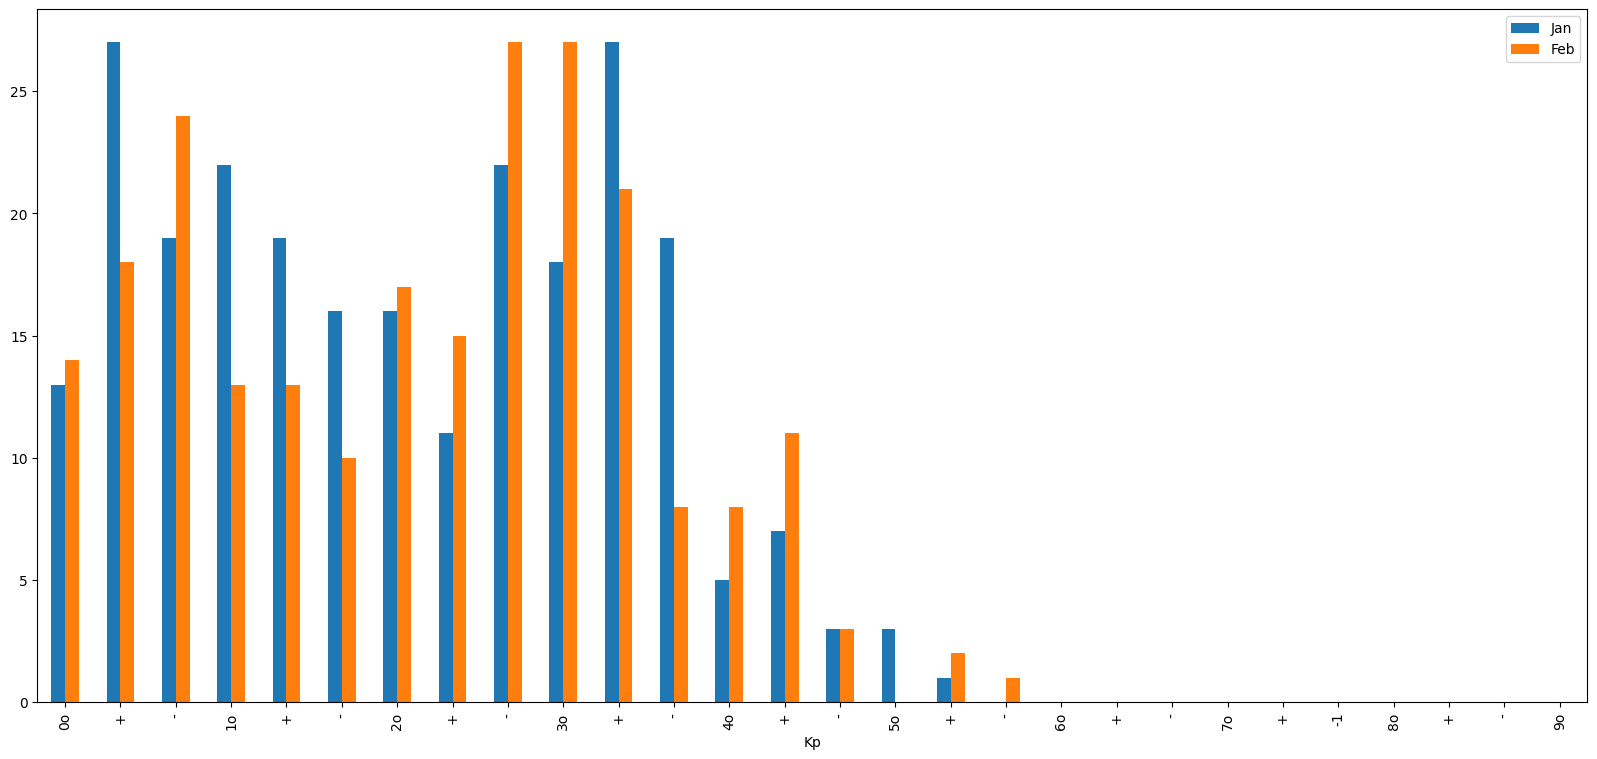

In [359]:
fig, ax = plt.subplots(figsize=(20, 9))

df4.loc[:,'Jan':'Feb'].astype(float).plot(kind = 'bar', ax= ax,);

In [181]:
np.min(sw['Np'].unique())

0.1

In [182]:
np.max(sw['Np'].unique())

999.9

In [187]:
### Categorize the plasma density at 1au
sw.loc[(sw['Np'] >= 0.1) & (sw['Np'] < 7), 'Np_Category'] = 'low'
sw.loc[(sw['Np'] >= 7) & (sw['Np'] < 60), 'Np_Category'] = 'high'
sw.loc[sw['Np'] >= 60, 'Np_Category'] = 'other'

In [188]:
sw['Np_Category'].value_counts(dropna = False)

Np_Category
low      172882
high      76888
other     21982
Name: count, dtype: int64

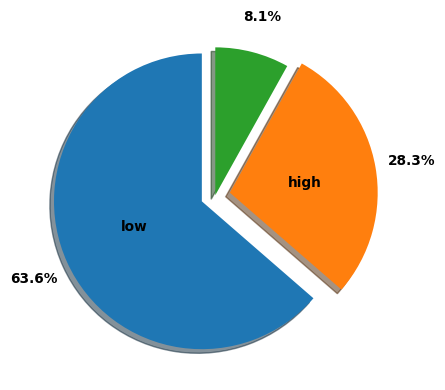

In [189]:
fig, ax = plt.subplots()

explode = (0.1, 0.1, 0)
labels = 'low', 'high', ''

ax.pie(sw['Np_Category'].value_counts(dropna = False), labels = labels, explode = explode,
       autopct='%1.1f%%',labeldistance=0.4,pctdistance=1.25, shadow= True, startangle=90,
      textprops={'size': 9.8,'fontweight' : 'bold'})


plt.show()

In [190]:
sw

,B,T[K],Np,Ur,Wind_Category,Np_Category
date,,,,,,
1992-01-01 00:30:00+00:00,999.9,10000000.0,999.9,NaN,NaN,other
1992-01-01 01:30:00+00:00,999.9,10000000.0,999.9,NaN,NaN,other
1992-01-01 02:30:00+00:00,999.9,10000000.0,999.9,NaN,NaN,other
1992-01-01 03:30:00+00:00,999.9,10000000.0,999.9,NaN,NaN,other
1992-01-01 04:30:00+00:00,999.9,10000000.0,999.9,NaN,NaN,other
...,...,...,...,...,...,...
2022-12-31 19:30:00+00:00,999.9,152295.0,2.8,610.0,Fast,low
2022-12-31 20:30:00+00:00,999.9,169152.0,2.8,611.0,Fast,low
2022-12-31 21:30:00+00:00,999.9,124976.0,2.6,603.0,Fast,low


In [118]:
df_1 = pd.read_csv('Data_collection/Data/sunspot.csv', skiprows=None, header=None)
sn = df_1.iloc[:,0:7]

In [119]:
##Function to convert the time to gregorian date
def to_gregorian_date(year,month,day):
    Date = []
    for i,j,k in zip(year,month,day):
        date = datetime(i,j,k)
        gregorian_date = date.strftime('%Y-%m-%d %H:%M:%S')
        Date.append(gregorian_date)
    return Date    

In [120]:
sn['Date']=to_gregorian_date(sn[0],sn[1],sn[2])
sn.head(2)

,0,1,2,3,4,5,6,Date
0,1992,1,1,1992.001,186,0,186,1992-01-01 00:00:00
1,1992,1,2,1992.004,190,18,172,1992-01-02 00:00:00


In [121]:
##Convert the date column to a datetime data type
sn['date'] = pd.to_datetime(sn['Date'])

In [122]:
## Convert the date column as the index and convert the time to UTC format
sn.index = sn['date']
sn.index = sn.index.tz_localize('UTC')

In [123]:
sn.head(3)

,0,1,2,3,4,5,6,Date,date
date,,,,,,,,,
1992-01-01 00:00:00+00:00,1992,1,1,1992.001,186,0,186,1992-01-01 00:00:00,1992-01-01
1992-01-02 00:00:00+00:00,1992,1,2,1992.004,190,18,172,1992-01-02 00:00:00,1992-01-02
1992-01-03 00:00:00+00:00,1992,1,3,1992.007,234,26,208,1992-01-03 00:00:00,1992-01-03


In [124]:
# Only select the total sunspot number and the north , south sunspot number column
SN = sn.iloc[:,4:7]

In [125]:
## Rename the columns
SN.columns = ['total sunspots','north number', 'south number']

In [126]:
SN.head(4) ## Display the daily sunspot number from 1992-01-01

,total sunspots,north number,south number
date,,,
1992-01-01 00:00:00+00:00,186,0,186
1992-01-02 00:00:00+00:00,190,18,172
1992-01-03 00:00:00+00:00,234,26,208
1992-01-04 00:00:00+00:00,243,54,189


In [127]:
# Check for nulls
SN.isna().sum()

total sunspots    0
north number      0
south number      0
dtype: int64

In [128]:
# Check for nunique
SN.nunique()

total sunspots    308
north number      201
south number      200
dtype: int64

In [129]:
SN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11596 entries, 1992-01-01 00:00:00+00:00 to 2023-09-30 00:00:00+00:00
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   total sunspots  11596 non-null  int64
 1   north number    11596 non-null  int64
 2   south number    11596 non-null  int64
dtypes: int64(3)
memory usage: 362.4 KB


In [130]:
min(SN['total sunspots'])

0

In [131]:
#arima = SN.loc['1992-01':'2022-12']

#### Plot the Sunspot solar cycle

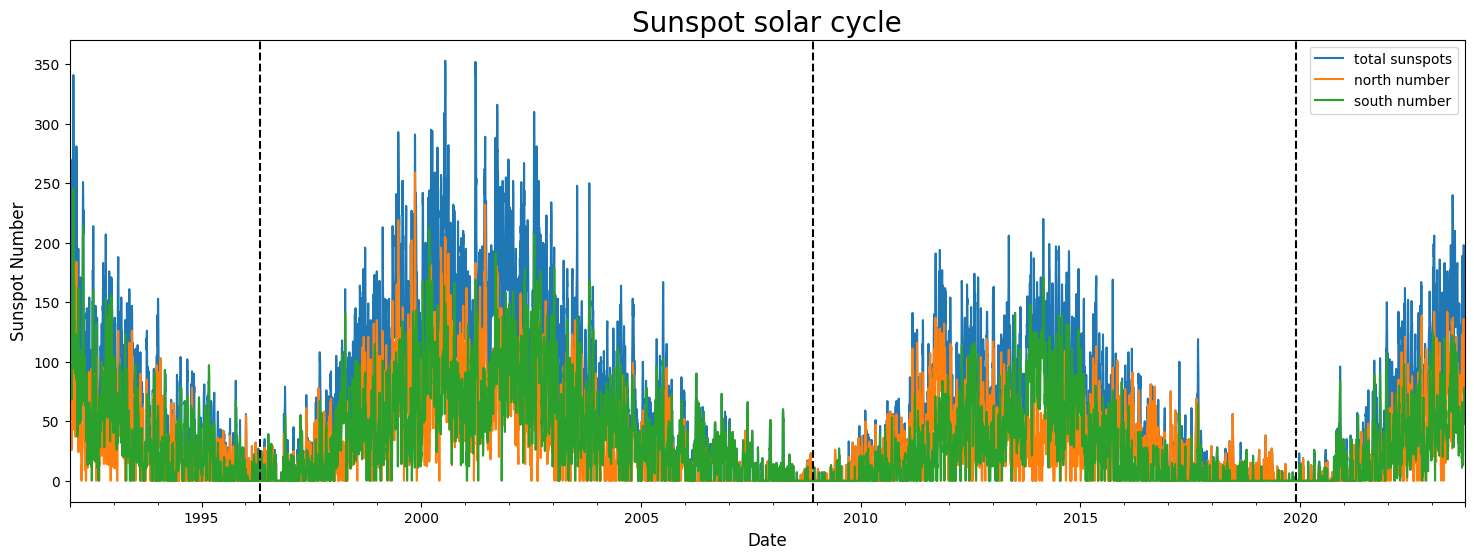

In [132]:
fig, ax = plt.subplots(figsize=(18, 6))  

SN.plot(ax=ax)

ax.set_xlabel("Date",fontdict= {'size': 12})
ax.set_ylabel("Sunspot Number",fontdict= {'size': 12})
ax.set_title("Sunspot solar cycle",fontdict= {'size': 20})

# Add vertical lines at specific dates
ax.axvline('1996-05', color='k', linestyle='--')
ax.axvline('2008-12', color='k', linestyle='--')
ax.axvline('2019-12', color='k', linestyle='--')

plt.show()

In [16]:
## Function to test whether the series is stationary and the value for d
def find_d(data):
    d = 0    # Initialize d to 0
    
    while adfuller(data.dropna())[1] >= 0.05:
        data = data.diff().dropna()         # Differencing the data
        d += 1                              # Increment d
        
    print(f'Series is stationary, and d = {d}')

In [17]:
find_d(SN['total sunspots'])

Series is stationary, and d = 0


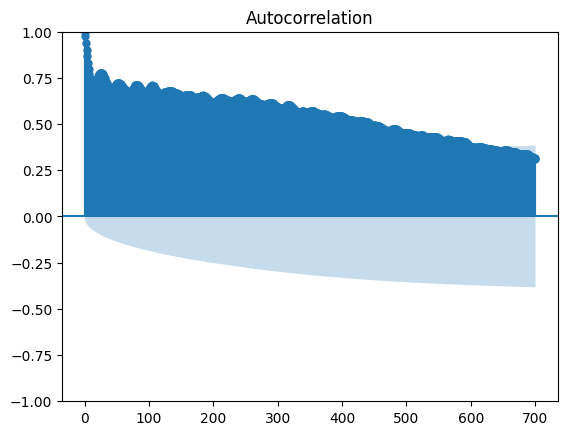

In [18]:
plot_acf(SN['total sunspots'].dropna(),lags = 700);

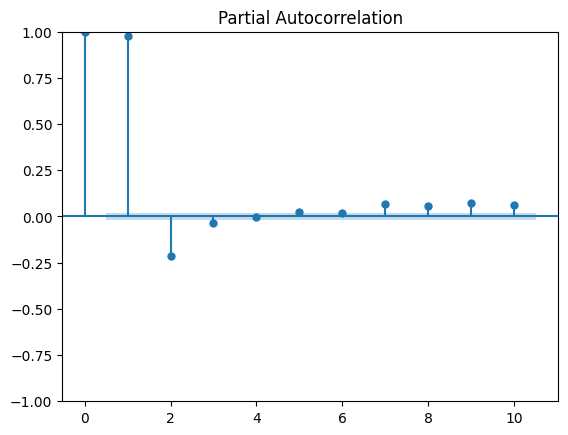

In [19]:
plot_pacf(SN['total sunspots'].dropna(),lags = 10);

In [20]:
# Create train-test split.
X_train, X_test, y_train, y_test = train_test_split(SN['total sunspots'],
                                                    SN['total sunspots'],
                                                    test_size = 0.3,
                                                    shuffle = False) # Shuffle = False is IMPORTANT!

In [22]:
import warnings
# Set to ignore any warnings
warnings.filterwarnings('ignore')

In [30]:
model = ARIMA(endog=y_train.astype(float).dropna(), order = (52, 0, 10)) 

In [ ]:
# Fit model.
arima = model.fit()

In [ ]:
y_test

In [ ]:
predictions = arima.predict(start = y_test.index[0], end = y_test.index[-1])

#### Plot the predictions

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))  

y_train.plot(ax=ax)
y_test.plot(ax=ax)
predictions.plot(ax=ax)

ax.set_xlabel("Time")
ax.set_ylabel("Sunspot number")
ax.set_title("Solar cycle predictions")
#ax.legend(['B_{1au}','Arima_model']) 

plt.show()

In [1093]:
df_1 = pd.read_csv('Data_collection/Data/1992-2023.csv1',skiprows=0)

In [1094]:
##define the columns
df_1.columns = ['date', 'B','T[K]','Np','Ur']

In [1095]:
df_1['date']=pd.to_datetime(df_1['date'])

In [1096]:
df_1.set_index('date' , inplace = True)

In [1097]:
OMNI = df_1.resample('D').mean()

In [1098]:
OMNI.head()

,B,T[K],Np,Ur
date,,,,
1992-01-01 00:00:00+00:00,793.791667,1.000000e+07,999.900000,9999.000000
1992-01-02 00:00:00+00:00,751.920833,8.349143e+06,834.462500,8406.500000
1992-01-03 00:00:00+00:00,381.237500,4.199707e+06,419.579167,4417.375000
1992-01-04 00:00:00+00:00,505.575000,5.060331e+06,502.795833,5229.333333
1992-01-05 00:00:00+00:00,545.333333,5.468875e+06,544.137500,5624.333333


In [1099]:
B = []
for i in OMNI['B']:
    if i > 30:
        B.append(np.nan)
    else:
        B.append(i)

In [1100]:
OMNI['B']=B

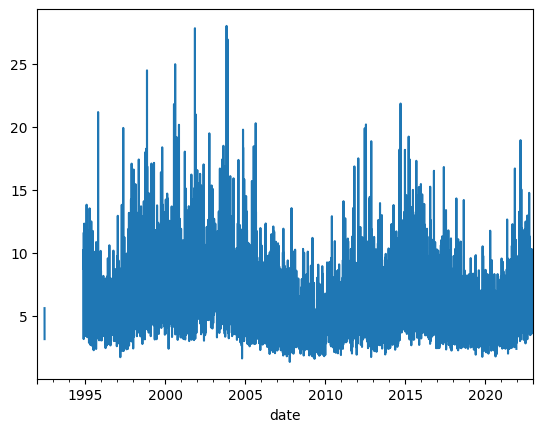

In [1101]:
OMNI['B'].plot();

In [1102]:
U= []
for i in OMNI['Ur']:
    if i > 1000:
        U.append(np.nan)
    else:
        U.append(i)

In [1103]:
OMNI['Ur'] = U

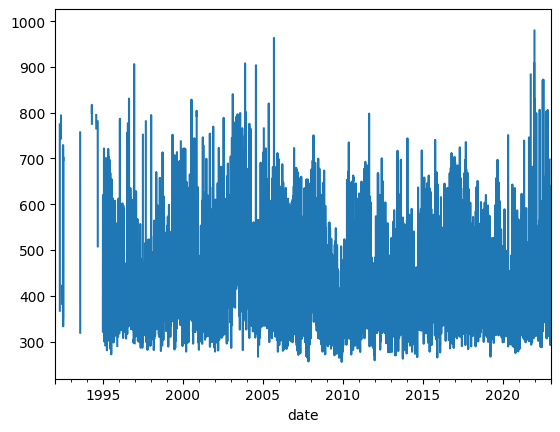

In [1104]:
OMNI['Ur'].plot();

In [1105]:
N= []
for i in OMNI['Np']:
    if i > 30:
        N.append(np.nan)
    else:
        N.append(i)

In [1106]:
OMNI['Np'] = N

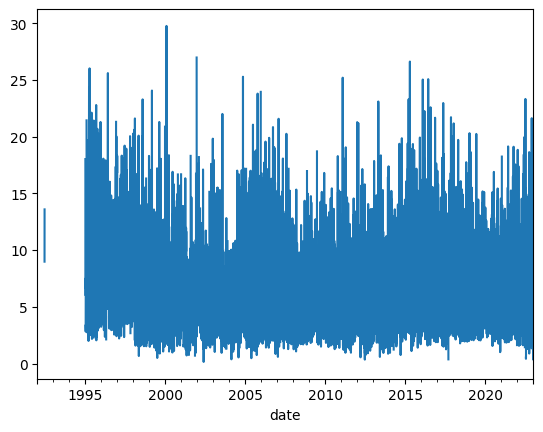

In [1107]:
OMNI['Np'].plot();

In [1108]:
T= []
for i in OMNI['T[K]']:
    if i > 0.500000e+06:
        T.append(np.nan)
    else:
        T.append(i)

In [1109]:
OMNI['T[K]'] = T

<Axes: xlabel='date'>

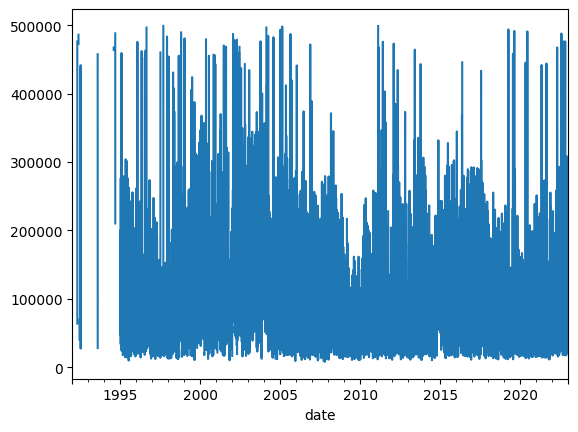

In [1110]:
OMNI['T[K]'].plot()

In [1111]:
arima.dropna()

,tot,north,south
date,,,
1992-01-01,186,0,186
1992-01-02,190,18,172
1992-01-03,234,26,208
1992-01-04,243,54,189
1992-01-05,242,58,184
...,...,...,...
2022-12-27,94,77,17
2022-12-28,103,72,31
2022-12-29,123,80,43


In [1112]:
arima

,tot,north,south
date,,,
1992-01-01,186,0,186
1992-01-02,190,18,172
1992-01-03,234,26,208
1992-01-04,243,54,189
1992-01-05,242,58,184
...,...,...,...
2022-12-27,94,77,17
2022-12-28,103,72,31
2022-12-29,123,80,43


In [1113]:
#arima.plot()

In [1114]:
arima.index = arima.index.tz_localize('UTC')

In [1115]:
arima

,tot,north,south
date,,,
1992-01-01 00:00:00+00:00,186,0,186
1992-01-02 00:00:00+00:00,190,18,172
1992-01-03 00:00:00+00:00,234,26,208
1992-01-04 00:00:00+00:00,243,54,189
1992-01-05 00:00:00+00:00,242,58,184
...,...,...,...
2022-12-27 00:00:00+00:00,94,77,17
2022-12-28 00:00:00+00:00,103,72,31
2022-12-29 00:00:00+00:00,123,80,43


In [1357]:
OMNI;

In [1360]:
New = OMNI.merge(arima, left_index=True, right_index=True, how='inner')

In [1361]:
#New.dropna(inplace = True)

In [1362]:
New

,B,T[K],Np,Ur,tot,north,south
date,,,,,,,
1992-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,186,0,186
1992-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,190,18,172
1992-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,234,26,208
1992-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,243,54,189
1992-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,242,58,184
...,...,...,...,...,...,...,...
2022-12-27 00:00:00+00:00,NaN,170672.500000,1.887500,516.250000,94,77,17
2022-12-28 00:00:00+00:00,NaN,170318.416667,1.825000,476.875000,103,72,31
2022-12-29 00:00:00+00:00,NaN,97242.500000,5.850000,429.666667,123,80,43


In [1363]:
New.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11323 entries, 1992-01-01 00:00:00+00:00 to 2022-12-31 00:00:00+00:00
Freq: D
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   B       10152 non-null  float64
 1   T[K]    9785 non-null   float64
 2   Np      9675 non-null   float64
 3   Ur      10188 non-null  float64
 4   tot     11323 non-null  int64  
 5   north   11323 non-null  int64  
 6   south   11323 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 965.7 KB


In [1364]:
from statsmodels.tsa.stattools import adfuller

In [1365]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [1366]:
interpret_dftest(adfuller(New['B'].dropna()))

Test Statistic   -5.291735
p-value           0.000006
dtype: float64

In [1367]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

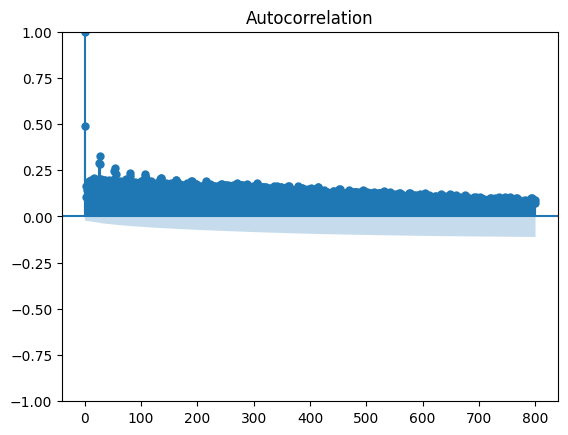

In [1368]:
# Generate plot.
plot_acf(New['B'].dropna(),lags = 800);

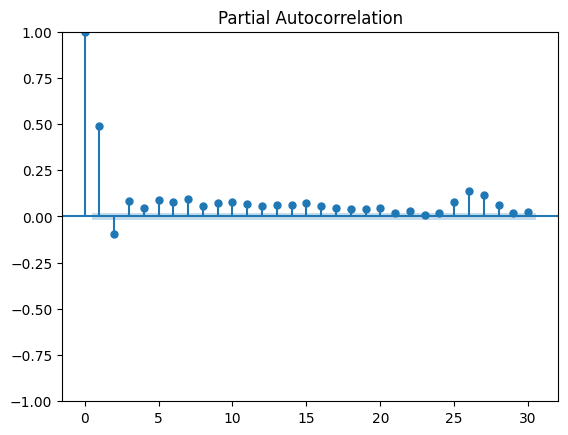

In [1369]:
# Generate plot.
plot_pacf(New['B'].dropna(),lags = 30);

In [1370]:
# Create train-test split.
X_train, X_test, y_train, y_test = train_test_split(New.drop(columns=['B','T[K]','Np','Ur']),New['B'], train_size= 0.70,test_size=0.30, shuffle = False) 

In [1371]:
#New.drop(columns=['B','T[K]','Np','Ur']

In [1372]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [1381]:
model = ARIMA(endog=y_train.astype(float),order = (52, 0, 28))

In [1382]:
# Fit model.
arima_2_0_1 = model.fit()

In [1383]:
y_train

date
1992-01-01 00:00:00+00:00         NaN
1992-01-02 00:00:00+00:00         NaN
1992-01-03 00:00:00+00:00         NaN
1992-01-04 00:00:00+00:00         NaN
1992-01-05 00:00:00+00:00         NaN
                               ...   
2013-09-08 00:00:00+00:00    3.779167
2013-09-09 00:00:00+00:00    3.641667
2013-09-10 00:00:00+00:00    4.412500
2013-09-11 00:00:00+00:00    4.520833
2013-09-12 00:00:00+00:00    5.691667
Freq: D, Name: B, Length: 7926, dtype: float64

In [1384]:
y_test

date
2013-09-13 00:00:00+00:00    7.012500
2013-09-14 00:00:00+00:00    2.833333
2013-09-15 00:00:00+00:00    3.766667
2013-09-16 00:00:00+00:00    4.179167
2013-09-17 00:00:00+00:00    5.904167
                               ...   
2022-12-27 00:00:00+00:00         NaN
2022-12-28 00:00:00+00:00         NaN
2022-12-29 00:00:00+00:00         NaN
2022-12-30 00:00:00+00:00         NaN
2022-12-31 00:00:00+00:00         NaN
Freq: D, Name: B, Length: 3397, dtype: float64

In [1385]:
preds = arima_2_0_1.predict(start = y_test.index[0], end = y_test.index[-1])

In [1386]:
y_test.index[0]

Timestamp('2013-09-13 00:00:00+0000', tz='UTC')

In [1387]:
preds

2013-09-13 00:00:00+00:00    5.238868
2013-09-14 00:00:00+00:00    4.639888
2013-09-15 00:00:00+00:00    5.118255
2013-09-16 00:00:00+00:00    5.980531
2013-09-17 00:00:00+00:00    5.895056
                               ...   
2022-12-27 00:00:00+00:00    5.527995
2022-12-28 00:00:00+00:00    5.528053
2022-12-29 00:00:00+00:00    5.528110
2022-12-30 00:00:00+00:00    5.528167
2022-12-31 00:00:00+00:00    5.528225
Freq: D, Name: predicted_mean, Length: 3397, dtype: float64

## Plot the time series plot

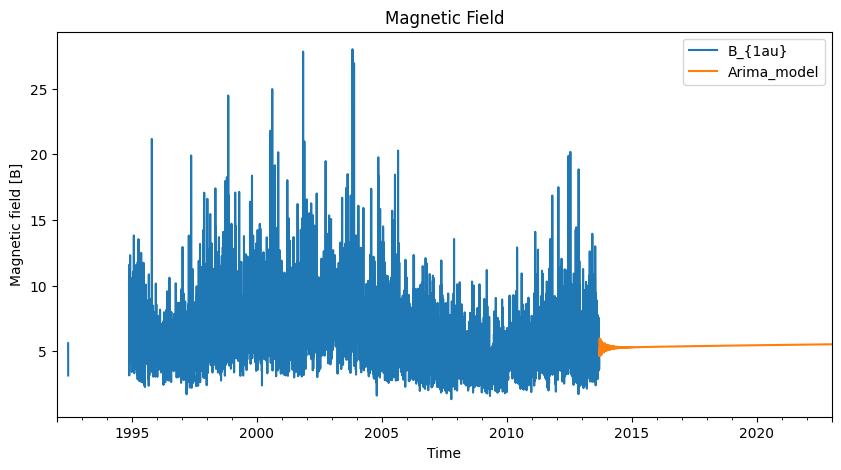

In [1389]:
fig, ax = plt.subplots(figsize=(10, 5))  


y_train.plot(ax=ax)
#y_test.plot(ax=ax)
preds.plot(ax=ax)

ax.set_xlabel("Time")
ax.set_ylabel("Magnetic field [B]")
ax.set_title("Magnetic Field")
ax.legend(['B_{1au}','Arima_model']) 

plt.show()

In [1402]:
preds[-60:-1]

2022-11-02 00:00:00+00:00    5.524822
2022-11-03 00:00:00+00:00    5.524880
2022-11-04 00:00:00+00:00    5.524938
2022-11-05 00:00:00+00:00    5.524996
2022-11-06 00:00:00+00:00    5.525054
2022-11-07 00:00:00+00:00    5.525112
2022-11-08 00:00:00+00:00    5.525170
2022-11-09 00:00:00+00:00    5.525227
2022-11-10 00:00:00+00:00    5.525285
2022-11-11 00:00:00+00:00    5.525343
2022-11-12 00:00:00+00:00    5.525401
2022-11-13 00:00:00+00:00    5.525459
2022-11-14 00:00:00+00:00    5.525517
2022-11-15 00:00:00+00:00    5.525575
2022-11-16 00:00:00+00:00    5.525633
2022-11-17 00:00:00+00:00    5.525690
2022-11-18 00:00:00+00:00    5.525748
2022-11-19 00:00:00+00:00    5.525806
2022-11-20 00:00:00+00:00    5.525864
2022-11-21 00:00:00+00:00    5.525922
2022-11-22 00:00:00+00:00    5.525980
2022-11-23 00:00:00+00:00    5.526037
2022-11-24 00:00:00+00:00    5.526095
2022-11-25 00:00:00+00:00    5.526153
2022-11-26 00:00:00+00:00    5.526211
2022-11-27 00:00:00+00:00    5.526268
2022-11-28 0

In [1332]:
from sklearn.linear_model import LinearRegression,LassoCV ,RidgeCV

In [1346]:
# Instantiate and fit the model
lr = RidgeCV()
lr.fit(X_train, y_train)

RidgeCV()

In [1347]:
# Evaluate R2 for train and test
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.0997107275766278, 0.0837685381839024)

In [1348]:
# Generate predicted test values.
pred = lr.predict(X_test)

In [1349]:
pred

array([6.70037483, 6.97183665, 7.20682484, ..., 5.58051227, 5.23908136,
       5.23248623])

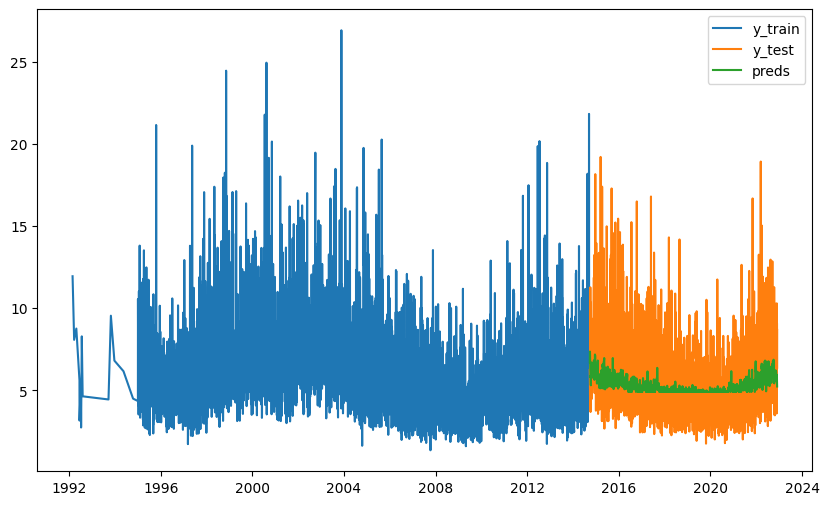

In [1350]:
# Let's plot our predictions! 
plt.figure(figsize=(10,6))

plt.plot(y_train, label ='y_train')
plt.plot(y_test, label = 'y_test')
plt.plot(np.array(y_test.index), pred, label = 'preds')
plt.legend();